<a href="https://colab.research.google.com/github/LinusRosales/T-NPS/blob/main/T_NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
raw_df = pd.read_csv('T-NPS (1).csv')
df = pd.read_csv('T-NPS (1).csv')
pd.set_option('display.max_columns', None)

In [ ]:
# for i in df.columns:
#   print(i)

# Fix Format

In [ ]:
df.columns = [col if not (pd.isna(col) or str(col).startswith("Unnamed")) else None for col in df.columns]

# Fill forward to propagate previous non-blank column name
df.columns = pd.Series(df.columns).fillna(method='ffill')

/tmp/ipython-input-6-976009947.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.columns = pd.Series(df.columns).fillna(method='ffill')


In [ ]:
from collections import defaultdict

grouped_columns = defaultdict(list)
for col in df.columns:
    grouped_columns[col].append(col)

# Step 3: Merge columns with the same question
new_df = df.copy()
for question, cols in grouped_columns.items():
    if len(cols) > 1:
        # Combine non-null values row-wise from the duplicate columns
        new_df[question] = df[cols].bfill(axis=1).iloc[:, 0]
        new_df.drop(columns=[col for col in cols if col != question], inplace=True)

**Remove Tagalog Questions**

In [ ]:
def shorten_column(col):
    for sep in ['?', '.']:
        if sep in col:
            return col.split(sep)[0].strip()
    return col.strip()  # No separator found

df.columns = [shorten_column(col) for col in df.columns]

In [ ]:
df['Please select your top 3 primary banks/e-wallet'].head(2)

,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet,Please select your top 3 primary banks/e-wallet
0,None of the above,BDO Unibank,BPI (Bank of the Philippine Islands),Metrobank,Land Bank of the Philippines,Security Bank,UnionBank,RCBC (Rizal Commercial Banking Corporation),China Bank,PNB (Philippine National Bank),EastWest Bank,GoTyme Bank,Maya Bank,Tonik Bank,CIMB Bank,"Overseas Bank (e.g., HSBC, Citibank, Standard ...",Seabank,OwnBank,GCash
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seabank,NaN,NaN


In [ ]:
questions = [
    "Which banks do you currently have an account with",
    "Please select your top 5 primary banks/e-wallet",
    "Please select your top 3 primary banks/e-wallet"
]

# Group column names under each question
question_cols = defaultdict(list)
for col in df.columns:
    for q in questions:
        if col.strip().startswith(q):
            question_cols[q].append(col)

# Combine selected answers for each question into one column
for q in questions:
    df[q + " (Combined)"] = df[question_cols[q]].apply(
        lambda row: ", ".join(
            str(val).strip() for val in row if pd.notna(val) and str(val).strip() != ""
        ), axis=1
    )

# STEP 4: (Optional) Drop the original one-hot columns
# for cols in question_cols.values():
#     df.drop(columns=cols, inplace=True)

# STEP 5: Show the combined columns
combined_cols = [q + " (Combined)" for q in questions]

for cols in question_cols.values():
    df.drop(columns=cols, inplace=True)

In [ ]:
combined_cols

['Which banks do you currently have an account with (Combined)',
 'Please select your top 5 primary banks/e-wallet (Combined)',
 'Please select your top 3 primary banks/e-wallet (Combined)']

In [ ]:
df['Which banks do you currently have an account with (Combined)'].head()

,Which banks do you currently have an account with (Combined)
0,"None of the above, BDO Unibank, BPI (Bank of t..."
1,"UnionBank, Maya Bank, Seabank, UnionBank, Maya..."
2,"BPI (Bank of the Philippine Islands), GoTyme B..."
3,"UnionBank, GoTyme Bank, UnionBank, GoTyme Bank..."
4,"GoTyme Bank, CIMB Bank, Seabank, GCash, GoTyme..."


In [ ]:
len(df.columns)

153

In [ ]:
approach_df = df.copy()

In [ ]:
approach_df = pd.read_csv('T-NPS (1).csv', header=[0, 1])

In [ ]:
# approach_df.columns = [
#     f"{q} - {bank}" if pd.notna(bank) else q
#     for q, bank in zip(approach_df.columns.get_level_values(0), approach_df.columns.get_level_values(1))
# ]

In [ ]:
# approach_df = approach_df.iloc[1:].reset_index(drop=True)

# def parse_peso_range(val):
#     if isinstance(val, str) and "P" in val:
#         numbers = val.replace("P", "").replace("₱", "").replace(",", "").split("-")
#         if len(numbers) == 2:
#             return (int(numbers[0]), int(numbers[1]))
#     return val

In [ ]:
# balance_cols = [col for col in approach_df.columns if "balance" in col.lower()]
# approach_df[balance_cols] = approach_df[balance_cols].applymap(parse_peso_range)

In [ ]:
# approach_df = approach_df.loc[:, ~approach_df.columns.str.contains('^Unnamed')]


In [ ]:
# def deduplicate_columns(cols):
#     seen = {}
#     new_cols = []

#     for col in cols:
#         if col not in seen:
#             seen[col] = 1
#             new_cols.append(col)
#         else:
#             count = seen[col]
#             new_col = f"{col}.{count}"
#             while new_col in seen:
#                 count += 1
#                 new_col = f"{col}.{count}"
#             seen[col] = count + 1
#             seen[new_col] = 1
#             new_cols.append(new_col)

#     return new_cols

# approach_df.columns = deduplicate_columns(approach_df.columns)


In [ ]:
# df_long = approach_df.melt(id_vars=["Respondent ID"], var_name="question", value_name="response")

In [ ]:
import pandas as pd

# Load data
df_raw = pd.read_csv("T-NPS (1).csv", header=None)

# Extract first 2 rows for headers
question_row = df_raw.iloc[0]
answer_row = df_raw.iloc[1]

# Combine question + answer as column names
columns = []

for q, a in zip(question_row, answer_row):
    if pd.isna(q) and pd.notna(a):
        # If the question is blank, use previous question
        q = columns[-1].split(" | ")[0] if columns else "Unknown"
    elif pd.isna(q):
        q = "Unknown"

    # Combine into one column name
    col = f"{q.strip()} | {a.strip()}" if pd.notna(a) else q.strip()
    columns.append(col)

# Apply new column names to the DataFrame
df_cleaned = df_raw.iloc[2:].copy()  # Data starts from row 2
df_cleaned.columns = columns

# Optional — reset index
df_cleaned.reset_index(drop=True, inplace=True)


In [ ]:
# Target column
column = 'Which banks do you currently have an account with (Combined)'

# Filter rows that mention "UnionBank" (even among multiple banks)
ub_df = df[df[column].str.contains(r'\bUnionBank\b', na=False, case=False)]

In [ ]:
ub_df['Which banks do you currently have an account with (Combined)'].head(10)

,Which banks do you currently have an account with (Combined)
0,"None of the above, BDO Unibank, BPI (Bank of t..."
1,"UnionBank, Maya Bank, Seabank, UnionBank, Maya..."
3,"UnionBank, GoTyme Bank, UnionBank, GoTyme Bank..."
8,"Metrobank, Land Bank of the Philippines, Union..."
11,"BDO Unibank, Security Bank, UnionBank, GoTyme ..."
15,"BDO Unibank, BPI (Bank of the Philippine Islan..."
22,"BDO Unibank, UnionBank, GCash, BDO Unibank, Un..."
23,"BPI (Bank of the Philippine Islands), Security..."
32,"BPI (Bank of the Philippine Islands), UnionBan..."
34,"BPI (Bank of the Philippine Islands), Metroban..."


# Bank with account, balance, transactions

**Identified Banks they have an account with**

In [ ]:
id_cols = [
    'Respondent ID',
    'Collector ID',
    'Start Date',
    'End Date',
    'IP Address',
    'Email Address',
    'First Name',
    'Last Name',
    'Custom Data 1',
    'rq_flag',
    'language',
    'Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback?Bago tayo magpatuloy, sumasang-ayon ka ba sa mga tuntunin at kondisyon at handang magbigay ng iyong buong, tapat, at bukas na feedback? | Response',
    'Please provide the email address where you received this survey invite.(Pakibigay ang email address kung saan mo nareceive ang survey na ito.) | Open-Ended Response',
]

# Identify the one-hot encoded bank columns
bank_cols = [col for col in df_cleaned.columns if col.startswith("Which banks do you currently have an account with")]

# Convert to long format (melt)
df_long = df_cleaned.melt(
    id_vars=id_cols,
    value_vars=bank_cols,
    var_name='Bank Question',
    value_name='Selected'
)

# Keep only the selected banks (value not NaN or blank)
df_long = df_long[df_long['Selected'].notna() & (df_long['Selected'] != '')]

# Extract just the bank name from the combined column name
df_long['Bank'] = df_long['Bank Question'].str.extract(r'\|\s*(.*)$')

# Drop extra columns if you want to simplify
df_long.drop(columns=['Bank Question', 'Selected'], inplace=True)

# Reset index for a clean DataFrame
df_long.reset_index(drop=True, inplace=True)

In [ ]:
df_long['Respondent ID'].value_counts()

,count
Respondent ID,
118823739147,18
118823666487,17
118823681892,17
118823656473,16
118823767796,16
...,...
118823669778,1
118823690951,1
118823718517,1


In [ ]:
# Identify all balance-related columns
balance_cols = [col for col in df_cleaned.columns if col.startswith("How much is your usual balance in each bank")]

# Melt balance columns to long format
df_balance = df_cleaned.melt(
    id_vars=id_cols,
    value_vars=balance_cols,
    var_name='Balance Question',
    value_name='Balance'
)

# Extract bank name from the balance question column
df_balance['Bank'] = df_balance['Balance Question'].str.extract(r'\|\s*(.*)$')

# Drop the helper column
df_balance.drop(columns=['Balance Question'], inplace=True)

# Merge with df_long using ID + Bank
merge_keys = id_cols + ['Bank']
df_final = pd.merge(df_long, df_balance, on=merge_keys, how='left')

In [ ]:
# Identify spend and transaction columns (per bank) ---
spend_cols = [col for col in df_cleaned.columns if col.startswith("How much do you usually spend per month using your primary bank")]
txn_cols = [col for col in df_cleaned.columns if col.startswith("How many transactions do you perform per month using your primary bank")]

# --- Melt spend ---
df_spend = df_cleaned.melt(
    id_vars=id_cols,
    value_vars=spend_cols,
    var_name='Spend Question',
    value_name='Spend'
)
df_spend['Bank'] = df_spend['Spend Question'].str.extract(r'\|\s*(.*)$')
df_spend.drop(columns=['Spend Question'], inplace=True)

# --- Melt transactions ---
df_txn = df_cleaned.melt(
    id_vars=id_cols,
    value_vars=txn_cols,
    var_name='Txn Question',
    value_name='Transactions'
)
df_txn['Bank'] = df_txn['Txn Question'].str.extract(r'\|\s*(.*)$')
df_txn.drop(columns=['Txn Question'], inplace=True)

# --- Merge all into df_final on Respondent ID + Bank ---
merge_keys = id_cols + ['Bank']
df_final = pd.merge(df_final, df_spend, on=merge_keys, how='left')
df_final = pd.merge(df_final, df_txn, on=merge_keys, how='left')

bank_balance_df = df_final.copy()

In [ ]:
bank_balance_df.head(1)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,rq_flag,language,"Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback?Bago tayo magpatuloy, sumasang-ayon ka ba sa mga tuntunin at kondisyon at handang magbigay ng iyong buong, tapat, at bukas na feedback? | Response",Please provide the email address where you received this survey invite.(Pakibigay ang email address kung saan mo nareceive ang survey na ito.) | Open-Ended Response,Bank,Balance,Spend,Transactions
0,118824322726,460146527,03/20/2025 08:45:51 AM,03/20/2025 08:49:54 AM,203.177.24.195,NaN,NaN,NaN,NaN,0.0,en,Yes (Oo),maileen_dy@yahoo.com,None of the above,NaN,NaN,NaN


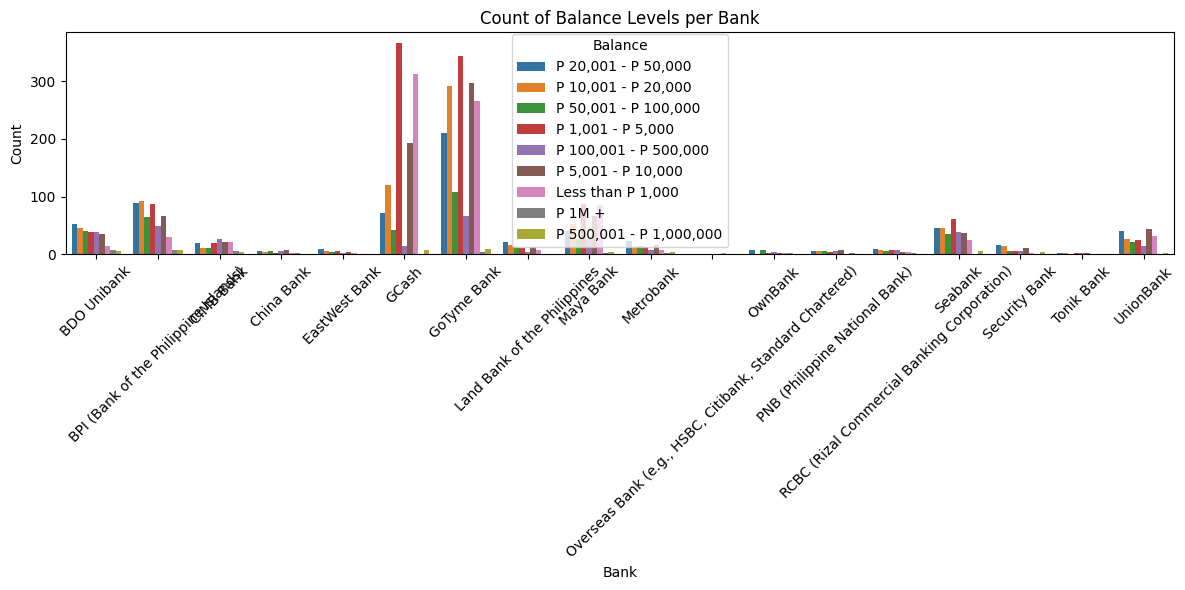

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and count
grouped = bank_balance_df.groupby('Bank')['Balance'].value_counts().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Bank', y='Count', hue='Balance')

plt.title('Count of Balance Levels per Bank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Likert Scale

In [ ]:
unique_columns = list(set(df.columns.to_list()))

In [ ]:
df['Which type of interactions have you done with GoTyme Bank for the last 3 months'].head(3)

,Which type of interactions have you done with GoTyme Bank for the last 3 months,Which type of interactions have you done with GoTyme Bank for the last 3 months,Which type of interactions have you done with GoTyme Bank for the last 3 months,Which type of interactions have you done with GoTyme Bank for the last 3 months,Which type of interactions have you done with GoTyme Bank for the last 3 months,Which type of interactions have you done with GoTyme Bank for the last 3 months,Which type of interactions have you done with GoTyme Bank for the last 3 months
0,None of the above,"Shop (e.g. Card Swipe or Tap, Online Transacti...","Move Money (e.g. Send Money, Cheque Deposit, C...","Save (e.g. GoSave, Time Deposit)",Payroll (e.g. received my money or allowance v...,Lend (e.g. BNPL MoreTyme),Service (e.g. Contacted Customer Service via I...
1,NaN,"Shop (e.g. Card Swipe or Tap, Online Transacti...","Move Money (e.g. Send Money, Cheque Deposit, C...","Save (e.g. GoSave, Time Deposit)",NaN,NaN,Service (e.g. Contacted Customer Service via I...
2,NaN,"Shop (e.g. Card Swipe or Tap, Online Transacti...","Move Money (e.g. Send Money, Cheque Deposit, C...",NaN,NaN,NaN,NaN


In [ ]:
# --- Define general matrix questions to extract ---
matrix_questions = [
    "Please rate GoTyme Bank based on the following criteria",
    'How likely are you going to recommend GoTyme Bank to your friends and family based on its usefulness',
    'How likely are you going to recommend GoTyme Bank to your friends and family based on its ease of use',
    'How likely are you going to recommend GoTyme Bank to your friends and family based on its security',
    "Which type of interactions have you done with GoTyme Bank for the last 3 months",
    "How likely are you to recommend GoTyme Bank to your friends and family based on the following Shop features:(Gaano mo irerekomenda ang GoTyme Bank sa iyong mga kaibigan at pamilya batay sa mga sumusunod na shop features",
    "How likely are you going to recommend GoTyme Bank to your friends and family based on Move Money features: (Cash-in/Cash out, Deposit, Withdraw, Send Money via Instapay, Pesonet, Cheque Deposit etc.)(Gaano mo i-rerecommend ang GoTyme Bank sa iyong friends o family base move money features",
    "How likely are you to recommend GoTyme Bank to your friends and family based on the following Savings features:(Gaano mo irerekomenda ang GoTyme Bank sa iyong mga kaibigan at pamilya batay sa mga sumusunod na shop features",
    "How likely are you to recommend GoTyme Bank to your friends and family based on the following Payroll features:(Gaano mo irerekomenda ang GoTyme Bank sa iyong mga kaibigan at pamilya batay sa mga sumusunod na Payroll features",
    "How likely are you to recommend GoTyme Bank to your friends and family based on the following BNPL features:(Gaano mo irerekomenda ang GoTyme Bank sa iyong mga kaibigan at pamilya batay sa mga sumusunod na BNPL features",
    "How likely are you going to recommend GoTyme Bank to your friends and family based on your customer service experience"

    # Add more general matrix-style questions here
]

# --- Container for all matrix responses ---
all_matrix_dfs = []

# --- Process each matrix block ---
for question_text in matrix_questions:
    # a. Find matching columns (those with the question text)
    matrix_cols = [col for col in df_cleaned.columns if col.startswith(question_text)]

    # b. Melt into long format
    df_matrix = df_cleaned.melt(
        id_vars=id_cols,
        value_vars=matrix_cols,
        var_name='Matrix Question',
        value_name='Rating'
    )

    # c. Extract sub-question (from the original column names)
    df_matrix['Sub Question'] = df_matrix['Matrix Question'].str.replace(question_text, '', regex=False).str.strip()

    # d. Store general question as its own column
    df_matrix['Question Group'] = question_text

    # e. clean numeric rating (if mixed with text like "10 - Strongly Agree")
    df_matrix['Rating Numeric'] = df_matrix['Rating'].str.extract(r'(\d+)').astype(float)

    # f. Drop helper column if not needed
    df_matrix.drop(columns=['Matrix Question'], inplace=True)

    # g. Append to list
    all_matrix_dfs.append(df_matrix)

# --- Combine all matrix blocks into a single long-format DataFrame ---
df_general = pd.concat(all_matrix_dfs, ignore_index=True)
df_likert = df_general.copy()


In [ ]:
df_likert['Sub Question'].unique()

array(['.(Paki-rate ang GoTyme base sa mga sumusunod na criteria.) | I am satisfied in my overall experience with GoTyme Bank.(Nasisiyahan ako sa aking overall experience gamit ang GoTyme Bank.)',
       '.(Paki-rate ang GoTyme base sa mga sumusunod na criteria.) | I strongly prefer GoTyme Bank over other banks.(Pinaka gusto ko ang GoTyme Bank kumpara sa ibang mga bangko.)',
       '.(Paki-rate ang GoTyme base sa mga sumusunod na criteria.) | I am going to continue using GoTyme Bank in the future.(Ipagpapatuloy ko pa ang pag gamit ng GoTyme sa future.)',
       '.(Paki-rate ang GoTyme base sa mga sumusunod na criteria.) | I feel SECURED whenever I use GoTyme Bank.(Secured ako sa tuwing ginagamit ko ang GoTyme Bank.)',
       '.(Paki-rate ang GoTyme base sa mga sumusunod na criteria.) | I TRUST GoTyme Bank with my financial transactions.(Pinagkakatiwalaan ko ang GoTyme Bank sa aking mga financial transactions.)',
       '?(Gaano mo i-rerecommend ang GoTyme Bank sa iyong friends o family

In [ ]:
df_general['Question Group'].unique()

array(['Please rate GoTyme Bank based on the following criteria',
       'How likely are you going to recommend GoTyme Bank to your friends and family based on its usefulness',
       'How likely are you going to recommend GoTyme Bank to your friends and family based on its ease of use',
       'How likely are you going to recommend GoTyme Bank to your friends and family based on its security',
       'Which type of interactions have you done with GoTyme Bank for the last 3 months',
       'How likely are you to recommend GoTyme Bank to your friends and family based on the following Shop features:(Gaano mo irerekomenda ang GoTyme Bank sa iyong mga kaibigan at pamilya batay sa mga sumusunod na shop features',
       'How likely are you going to recommend GoTyme Bank to your friends and family based on Move Money features: (Cash-in/Cash out, Deposit, Withdraw, Send Money via Instapay, Pesonet, Cheque Deposit etc.)(Gaano mo i-rerecommend ang GoTyme Bank sa iyong friends o family base move

In [ ]:
df_general.shape

(165068, 17)

In [ ]:
for i in df.columns:
  print(i)

Respondent ID
Collector ID
Start Date
End Date
IP Address
Email Address
First Name
Last Name
Custom Data 1
rq_flag
language
Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback
Please provide the email address where you received this survey invite
Let us know your overall thoughts about GoTyme Bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual balance in each bank
How much is your usual 